# Yield Curve Dynamics
#### A cursory look at the dynamics of ECB zero coupon bond yield curves

## Yield Curve Data by European Central Bank (ECB)

In [45]:
from IPython.display import Image

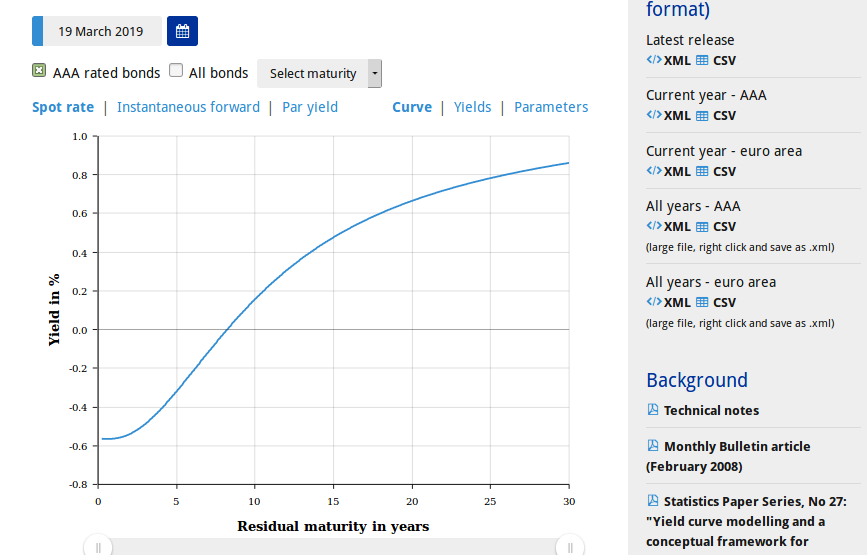

In [46]:
Image('../docs/_static/ecb_screenshot.png', width=600)

Source: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html

## Data Format

ECB publishes the bond yield curve in a parametric form, the so-called [Svensson Model](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=883856).
$$y(t) = \beta_0 + \beta_1 \Bigg(\frac{1-e^{\frac{-t}{\tau_1}}}{t / \tau_1}\Bigg) + \beta_2 \Bigg(\frac{1-e^{\frac{-t}{\tau_1}}}{t / \tau_1} - e^{\frac{-t}{\tau_1}}\Bigg) + \beta_3 \Bigg(\frac{1-e^{\frac{-t}{\tau_2}}}{t / \tau_2} - e^{\frac{-t}{\tau_2}}\Bigg)$$

In [47]:
import pandas as pd
pd.read_csv('../data/euryieldcurve.csv', parse_dates=['date'], index_col=0).head()

,beta0,beta1,beta2,beta3,tau1,tau2
date,,,,,,
2016-01-04,2.142562,-2.649562,19.953238,-24.067787,1.656860,1.814525
2016-01-05,2.154949,-2.660949,19.918749,-24.102527,1.653682,1.814610
2016-01-06,2.127892,-2.643892,19.932320,-24.088511,1.672715,1.835135
2016-01-07,2.180033,-2.682033,19.896829,-24.122854,1.686040,1.843311
2016-01-08,2.142886,-2.659886,19.927342,-24.091999,1.691714,1.848635


In [48]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt

In [49]:
from yield_curve_dynamics.data import load_csv
from yield_curve_dynamics.animate import create_animation
from yield_curve_dynamics.keyrates import keyrates
from yield_curve_dynamics.pca import shifted_log_diff, perform_pca, plot_pca1, plot_pca2, plot_pca_components

In [50]:
curves = list(load_csv('../data/euryieldcurve.csv'))

In [51]:
t = np.linspace(0,30,200)

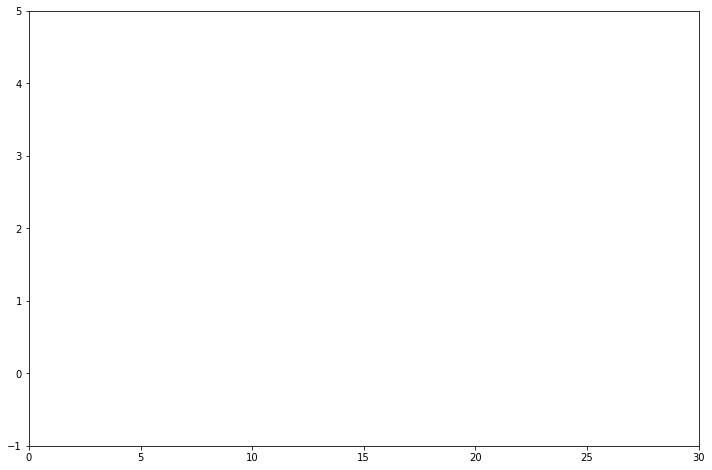

In [52]:
anim = create_animation(curves, t, 5);

## Yield Curve Animation

In [53]:
HTML(anim.to_jshtml())

In [54]:
HTML(anim.to_html5_video())

# Keyrate Time Series

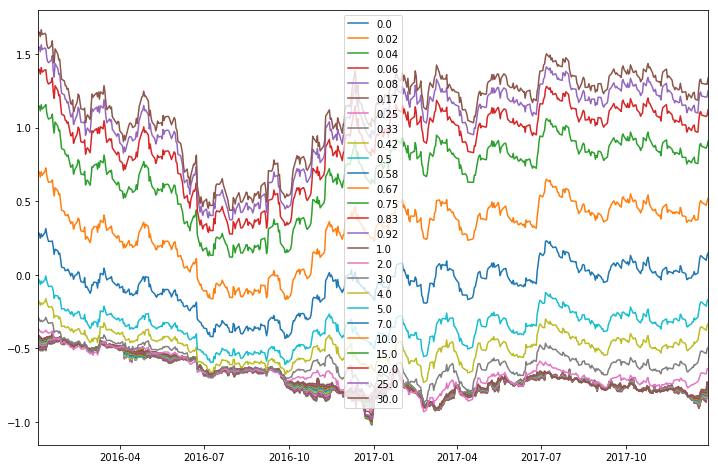

In [55]:
key_rates = keyrates(curves)
key_rates.plot(figsize=(12,8));

## Stationary Log Differences

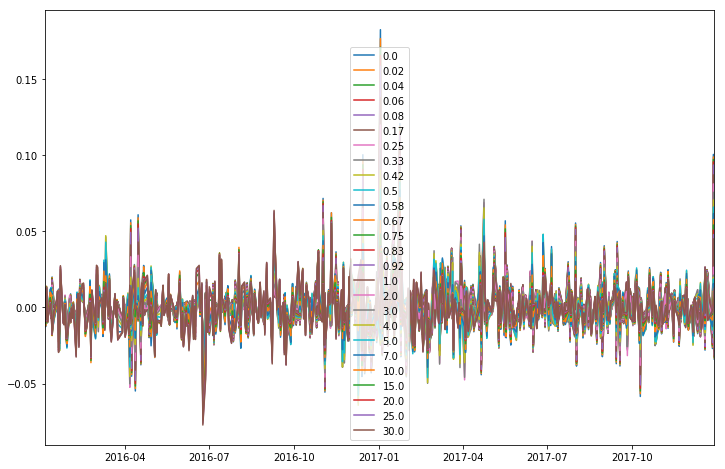

In [56]:
rate_changes = shifted_log_diff(key_rates)
rate_changes.plot(figsize=(12,8));

## Principal Component Analysis
#### Explained Variance vs. Number of Factors

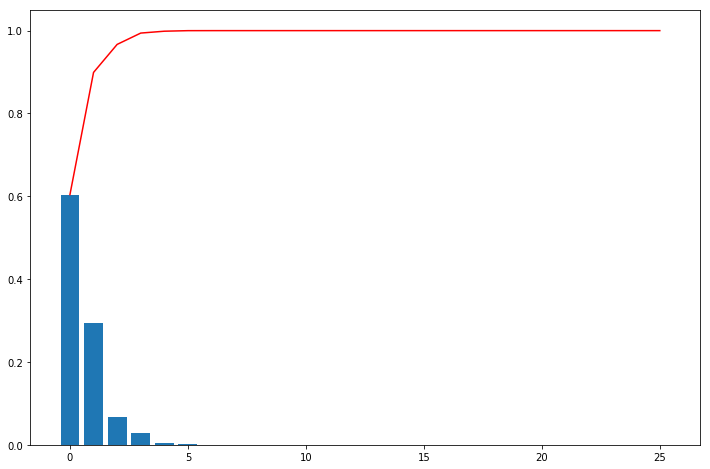

In [57]:
plot_pca2(pca);

## PCA - Alternative Computation

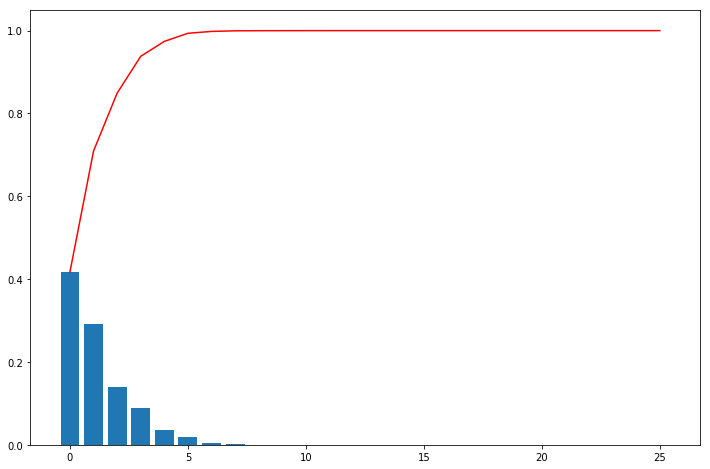

In [58]:
pca = perform_pca(rate_changes)
plot_pca1(pca);

## Principal Component Analysis
#### The first three factors

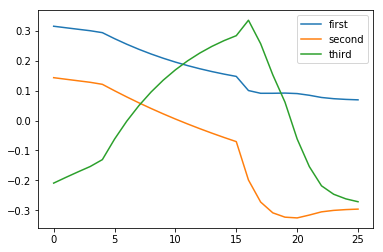

In [59]:
plot_pca_components(pca);